## Business Context
McDonalds is an American fast food company with operations in more than 100 countries and revenues
in excess of $ 20 billion. McDonald’s offers a menu that includes fries, the Big Mac, chicken sandwiches,
chicken nuggets, hamburgers, salads, wraps, desserts, soft drinks, and other beverages. However, to
ensure that it connects with the international markets, McDonald’s offers locally relevant food menus as
well.

Questions to be answered
1. Which food categories have the highest and lowest varieties?
2. Which all variables have an outlier?
3. Which category contributes to the maximum % of Cholesterol in a diet (% daily value)?
4. Which item contributes maximum to the Sodium intake?
5. Which 4 food items contains the most amount of Saturated Fat?


In [185]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [186]:
# Loading dataset and printing top 5 rows

data = pd.read_csv('Mcdonald .csv')
data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [187]:
data.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [188]:
data.shape

(260, 24)

In [189]:
data.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [190]:
data.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [191]:
data.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [192]:
a = data.dtypes[data.dtypes == 'object'].index
data[a].describe()

,Category,Item,Serving Size
count,260,260,260
unique,9,260,107
top,Coffee & Tea,Mocha (Small),16 fl oz cup
freq,95,1,45


In [193]:
data['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

<AxesSubplot:>

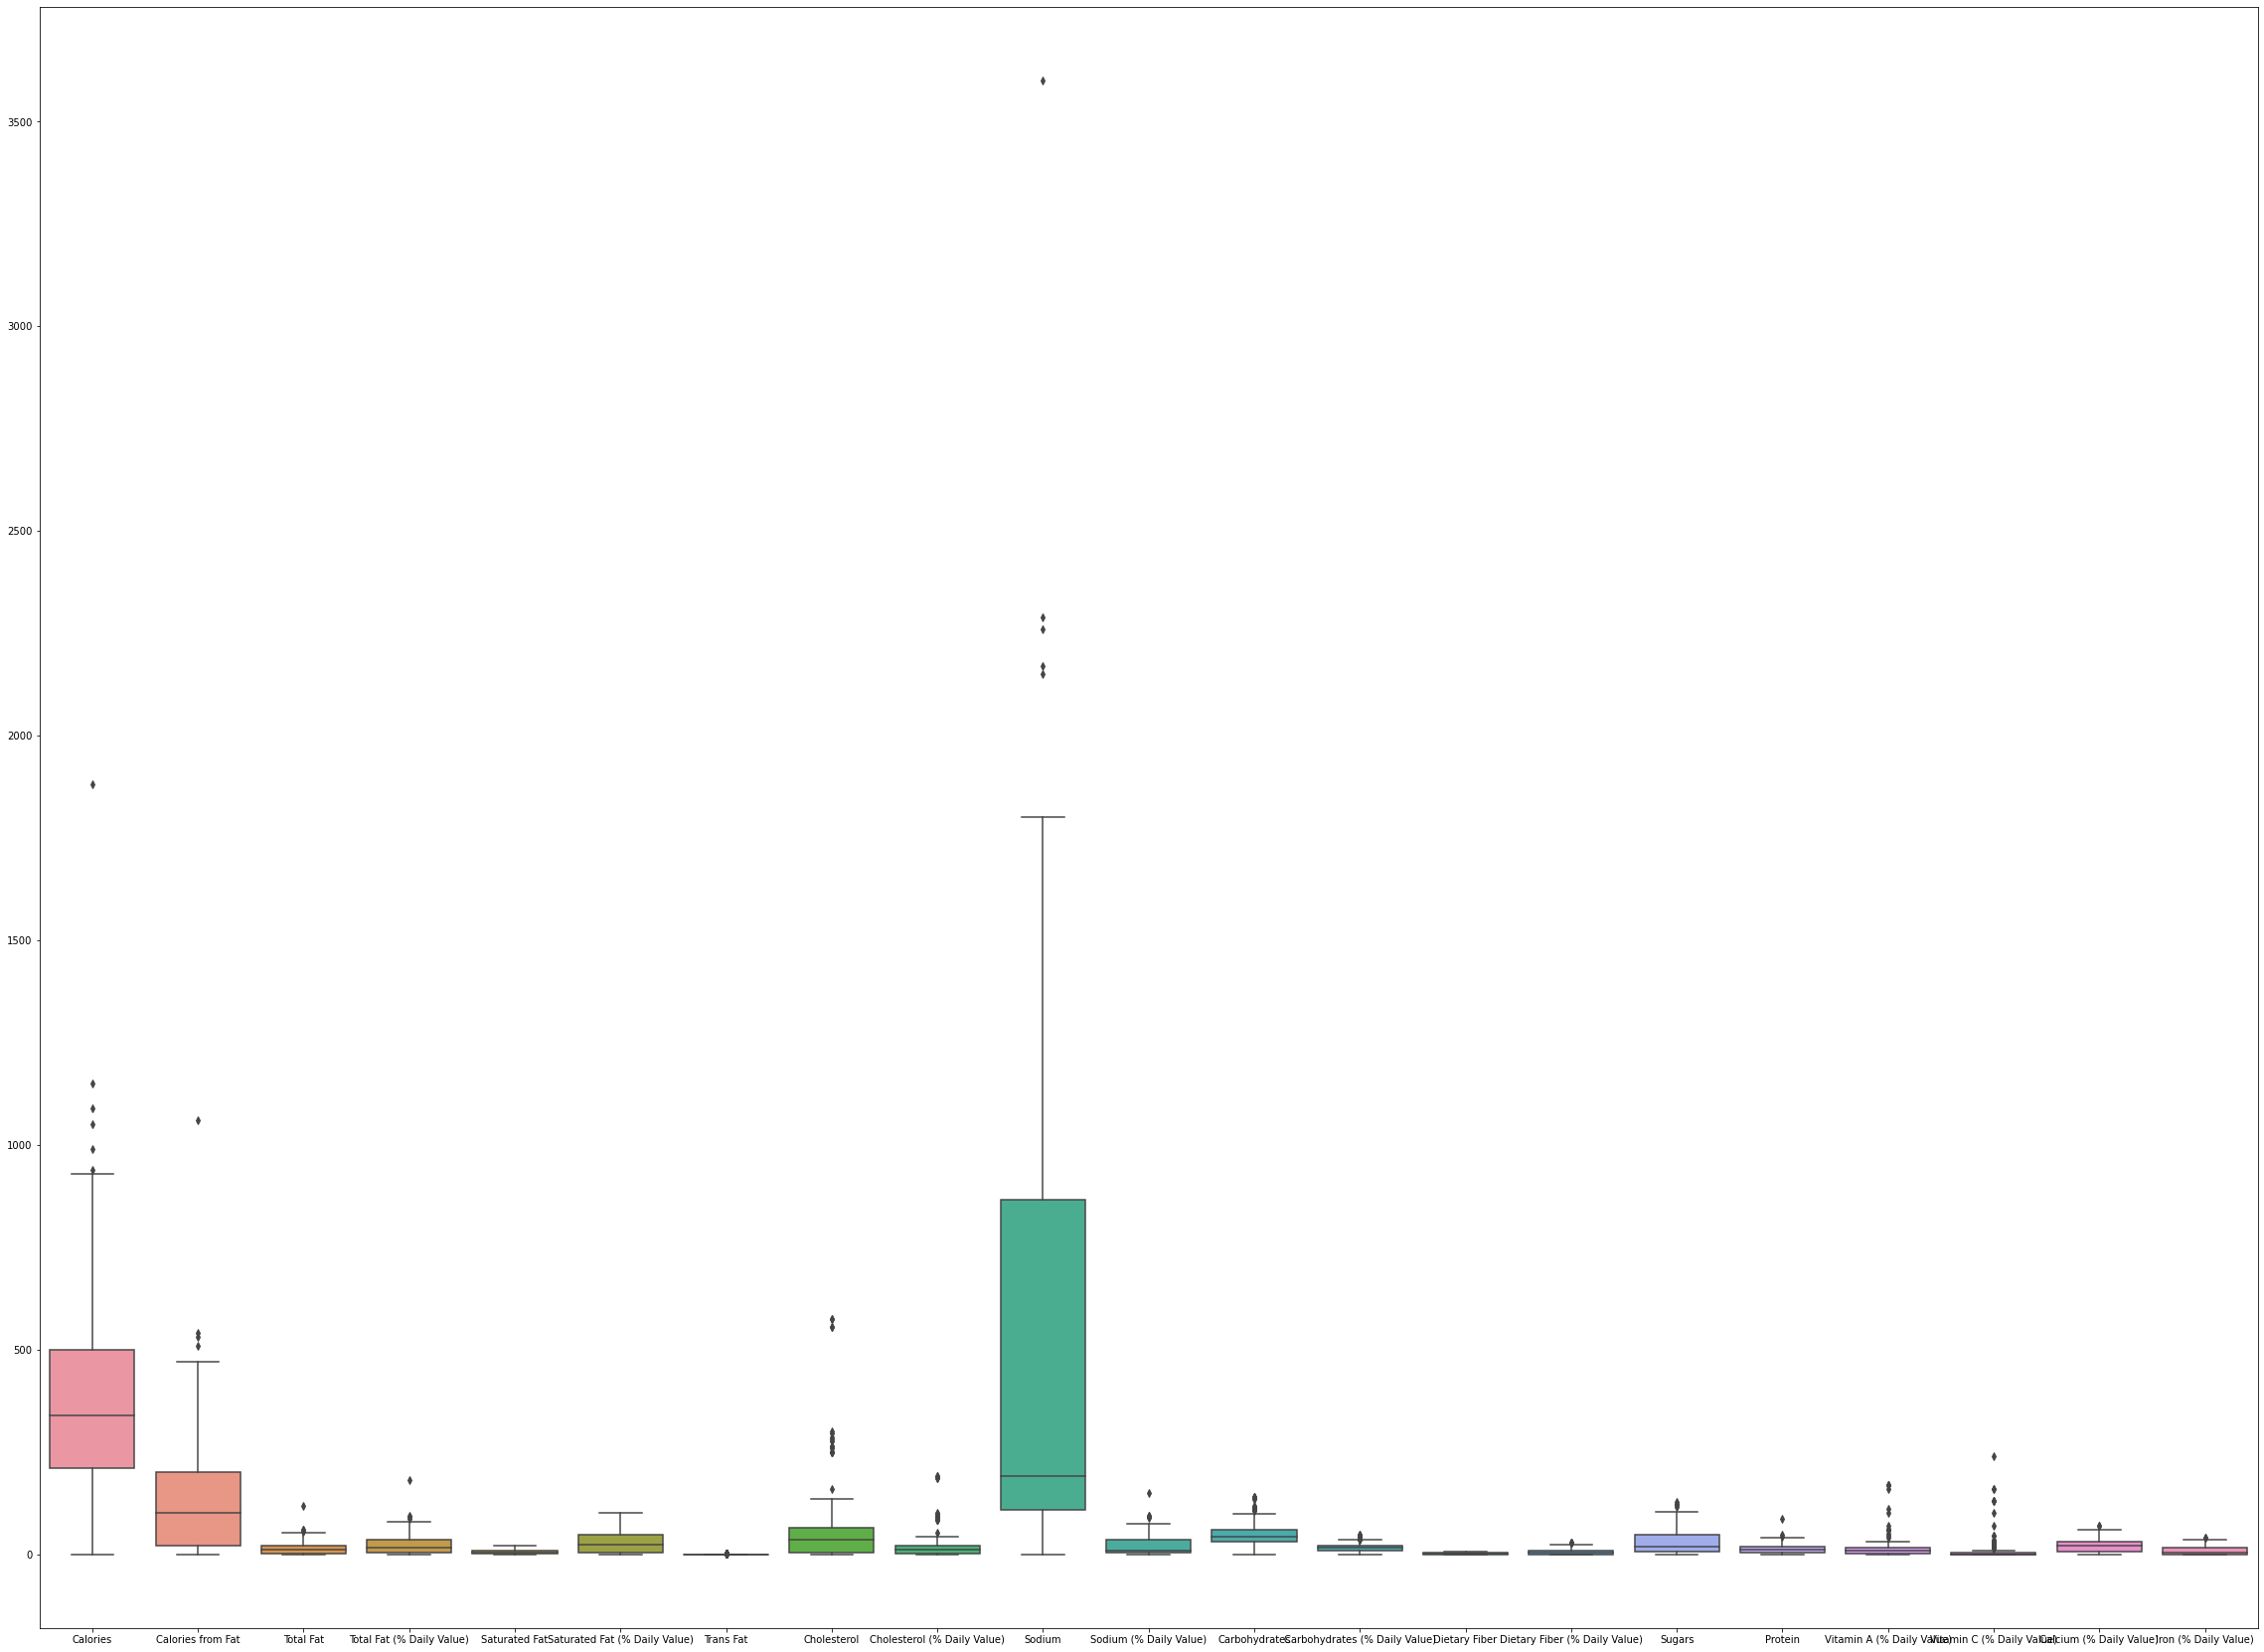

In [194]:
# Plotting the outliers
plt.figure(figsize=(40,30))
sns.boxplot(data=data)

The columns that have outliers:
1. Calories
2. Calories from Fat
3. Total Fat (Althoough less)
4. Total Fat (% Daily Value)
5. Cholestrol
6. Cholestrol (% Daily Value)
7. Sodium
8. Sodium (% Daily Value)
9. Carbohydrates
10. Sugars
11. Proteins
12. Vitamin A (So Many)
13. Vitamin C
14. Calcium (Very Less)

In [195]:
c = data.groupby('Category')['Cholesterol (% Daily Value)'].sum()

In [196]:
c

Category
Beef & Pork            434
Beverages                5
Breakfast             2140
Chicken & Fish         681
Coffee & Tea           891
Desserts                34
Salads                 104
Smoothies & Shakes     412
Snacks & Sides          81
Name: Cholesterol (% Daily Value), dtype: int64

Thus, Breakfast category contributes the most to the daily cholestrol intake

In [197]:
highest_sodium_intake = data.groupby("Item")['Sodium'].sum()

In [198]:
highest_sodium_intake

Item
1% Low Fat Milk Jug               125
Apple Slices                        0
Bacon Buffalo Ranch McChicken    1260
Bacon Cheddar McChicken          1260
Bacon Clubhouse Burger           1470
                                 ... 
Sweet Tea (Medium)                 10
Sweet Tea (Small)                  10
Vanilla Shake (Large)             260
Vanilla Shake (Medium)            200
Vanilla Shake (Small)             160
Name: Sodium, Length: 260, dtype: int64

In [199]:
d = dict(highest_sodium_intake)

In [200]:
d

{'1% Low Fat Milk Jug': 125,
 'Apple Slices': 0,
 'Bacon Buffalo Ranch McChicken': 1260,
 'Bacon Cheddar McChicken': 1260,
 'Bacon Clubhouse Burger': 1470,
 'Bacon Clubhouse Crispy Chicken Sandwich': 1720,
 'Bacon Clubhouse Grilled Chicken Sandwich': 1560,
 'Bacon McDouble': 1110,
 'Bacon, Egg & Cheese Bagel': 1480,
 'Bacon, Egg & Cheese Bagel with Egg Whites': 1480,
 'Bacon, Egg & Cheese Biscuit (Large Biscuit)': 1410,
 'Bacon, Egg & Cheese Biscuit (Regular Biscuit)': 1300,
 'Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)': 1420,
 'Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)': 1300,
 'Bacon, Egg & Cheese McGriddles': 1250,
 'Bacon, Egg & Cheese McGriddles with Egg Whites': 1250,
 'Baked Apple Pie': 170,
 'Big Breakfast (Large Biscuit)': 1680,
 'Big Breakfast (Regular Biscuit)': 1560,
 'Big Breakfast with Egg Whites (Large Biscuit)': 1700,
 'Big Breakfast with Egg Whites (Regular Biscuit)': 1590,
 'Big Breakfast with Hotcakes (Large Biscuit)': 2260,
 'Big

In [201]:
a = max(d.values())
a

3600

In [202]:
for key, value in d.items():
    if value == a:
        print(key, value)

Chicken McNuggets (40 piece) 3600


Thus, Chicken_McNuggets_(40_piece) leads to the highest sodium intake at a whooping amount of 3600

In [219]:
saturated_fat = data.groupby('Item')['Saturated Fat'].sum()

In [220]:
saturated_fat

Item
1% Low Fat Milk Jug               1.5
Apple Slices                      0.0
Bacon Buffalo Ranch McChicken     5.0
Bacon Cheddar McChicken           7.0
Bacon Clubhouse Burger           15.0
                                 ... 
Sweet Tea (Medium)                0.0
Sweet Tea (Small)                 0.0
Vanilla Shake (Large)            15.0
Vanilla Shake (Medium)           12.0
Vanilla Shake (Small)            10.0
Name: Saturated Fat, Length: 260, dtype: float64

In [221]:
max(saturated_fat)

20.0

In [232]:
saturated_fat.sort_values().tail(4)

Item
Frappé Chocolate Chip (Large)                  20.0
McFlurry with M&M’s Candies (Medium)           20.0
Chicken McNuggets (40 piece)                   20.0
Big Breakfast with Hotcakes (Large Biscuit)    20.0
Name: Saturated Fat, dtype: float64

4 Food Items whih contains the most Saturated Fat are:
1. Frappé Chocolate Chip (Large)    
2. McFlurry with M&M’s Candies (Medium) 
3. Chicken McNuggets (40 piece)
4. Big Breakfast with Hotcakes (Large Biscuit) 

In [235]:
data.std()   

Calories                         240.269886
Calories from Fat                127.875914
Total Fat                         14.205998
Total Fat (% Daily Value)         21.885199
Saturated Fat                      5.321873
Saturated Fat (% Daily Value)     26.639209
Trans Fat                          0.429133
Cholesterol                       87.269257
Cholesterol (% Daily Value)       29.091653
Sodium                           577.026323
Sodium (% Daily Value)            24.034954
Carbohydrates                     28.252232
Carbohydrates (% Daily Value)      9.419544
Dietary Fiber                      1.567717
Dietary Fiber (% Daily Value)      6.307057
Sugars                            28.679797
Protein                           11.426146
Vitamin A (% Daily Value)         24.366381
Vitamin C (% Daily Value)         26.345542
Calcium (% Daily Value)           17.019953
Iron (% Daily Value)               8.723263
dtype: float64

In [242]:
data['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

Coffee & Tea has the highest kinds of varieties and Salads have lowest types of Varieties